# 3次元データ(.xyz)から、煙突の形状を推測

In [3]:
# モジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
# CSV データの読み込み
datafile = './data/chimney5.xyz' # 適宜修正

data = np.loadtxt(datafile, usecols=[2, 3, 4])

print('データ数:', data.shape)

データ数: (1269879, 3)


In [5]:
# x, y, zの最小値を求める
x_min = np.amin(data[:, 0])
y_min = np.amin(data[:, 1])
z_min = np.amin(data[:, 2])

min = (x_min, y_min, z_min)

print('各座標の最小値:', min)

各座標の最小値: (-12.6065, 6.1975, 35.9454)


In [6]:
# x, y, zを最小値で正規化
data2 = data - min

print("修正後の座標の最小値: (%.3f, %.3f, %.3f)" % (np.amin(data2[:, 0]), np.amin(data2[:, 1]), np.amin(data2[:, 2]))) # 最小値を表示
print("修正後の座標の最大値: (%.3f, %.3f, %.3f)" % (np.amax(data2[:, 0]), np.amax(data2[:, 1]), np.amax(data2[:, 2]))) # 最大値を表示

修正後の座標の最小値: (0.000, 0.000, 0.000)
修正後の座標の最大値: (4.847, 5.139, 39.240)


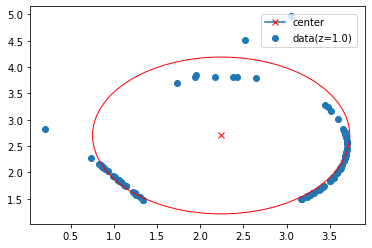

半径r: 1.489, 原点: (2.243, 2.700)


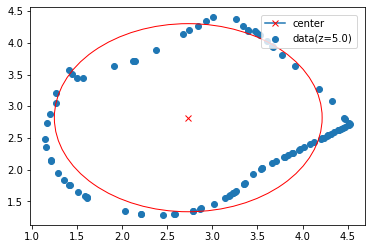

半径r: 1.482, 原点: (2.735, 2.819)


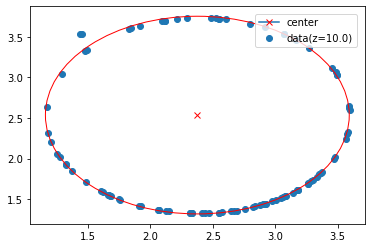

半径r: 1.217, 原点: (2.376, 2.536)


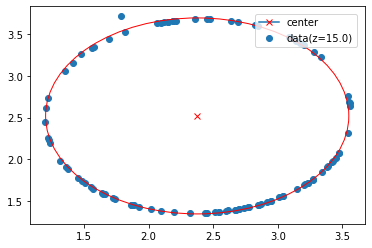

半径r: 1.174, 原点: (2.376, 2.520)


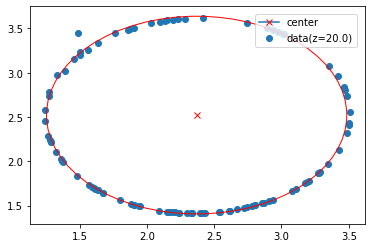

半径r: 1.116, 原点: (2.369, 2.522)


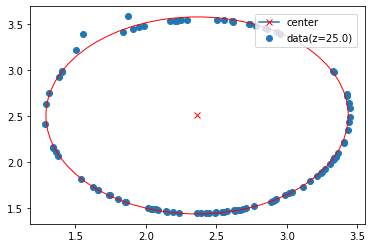

半径r: 1.072, 原点: (2.363, 2.510)


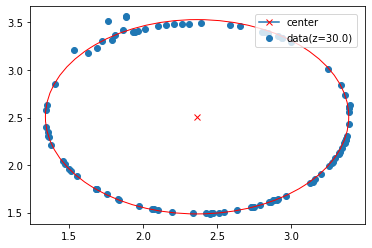

半径r: 1.022, 原点: (2.364, 2.508)


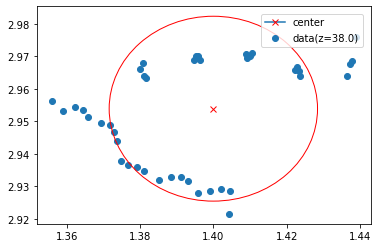

半径r: 0.028, 原点: (1.400, 2.954)


In [7]:
# 外径円の計算
z_list = (1, 5, 10, 15, 20, 25, 30, 38) # 外径円を求めるzの値
z_range = 0.1 # データを集めるレンジ
max_data = 100 # 最小二乗法に利用するデータの最大個数

# z_list の数だけ繰り返す
for z in z_list:
    # zが ±z_rangeのデータを抽出
    data3 = data2[(data2[:, 2] < (z + z_range)) & (data2[:, 2] > (z - z_range))]
    
    # 抽出したデータ数が max_data を超える場合、ランダムに抽出
    if data3.shape[0] > max_data: 
        data3 = data3[np.random.randint(data3.shape[0], size=max_data), :]

    # 最小二乗法のデータを作成
    x = data3[:, 0]
    y = data3[:, 1]
    
    # 連立1次方程式の係数
    A = np.zeros((3, 3))
    B = np.zeros((3, 1))

    A[0, 0] = np.sum(x * x)
    A[0, 1] = np.sum(x * y)
    A[0, 2] = np.sum(x)
    A[1, 0] = np.sum(x * y)
    A[1, 1] = np.sum(y * y)
    A[1, 2] = np.sum(y)
    A[2, 0] = np.sum(x)
    A[2, 1] = np.sum(y)
    A[2, 2] = x.shape[0]

    B[0] = -np.sum(x * (x * x + y * y))
    B[1] = -np.sum(y * (x * x + y * y))
    B[2] = -np.sum(x * x + y * y)
    
    # 連立1次方程式の解
    S = np.linalg.solve(A, B)
    
    # 円の中心(x0, y0),　半径(r)の計算
    x0 = -S[0]/2
    y0 = -S[1]/2
    r = np.sqrt(np.abs(x0**2 + y0**2 - S[2]))

    # matplotlib の準備
    ax = plt.axes()

    # データをプロット
    plt.scatter(x, y, label='data(z=%.1f)' % z)

    # 原点をプロット
    plt.plot(x0, y0, marker='x', markeredgecolor='red', label='center')

    # 円をプロット
    circle = patches.Circle(xy=(x0, y0), radius=r, ec='r', fill=False)
    ax.add_patch(circle)
        
    plt.legend(bbox_to_anchor=(0.99, 0.99), loc='upper right')
    plt.show()

    print("半径r: %.3f, 原点: (%.3f, %.3f)" % (r, x0, y0))